In [1]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [52]:
#Basic initial condition parameters
#defining grid size, time steps, CFL condition, etc...
nx = 81
T = 0.01
dt = .0002
nt = T/dt
dx = .25
gamma = 1.4


x = numpy.linspace(-10,10,nx-1)

In [18]:
def animate(data):
    x = numpy.linspace(-10,10,nx-1)
    y = data
    line.set_data(x,y)
    return line,

In [53]:
def u_initial(nx):
    
    Rho = numpy.ones(nx)
    Rho[int((nx-1)/2.):] = 0.125
    v = numpy.zeros(nx)
    p = 100000*numpy.ones(nx)
    p[int((nx-1)/2.):] = 10000
    return numpy.array([Rho, v, p])
    

In [54]:
z = u_initial(nx)        #initial conditions
print(z)


[[  1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.25000000e-01   1.25000000e-01   1.25000000e-01   1.25000000e-01
    1.25000000e-01   1.25000000e-01   1.25000000e-01   1.25000000e-01
    1.25000000e-01   1.25000000e-01   1.25000000e-01   1.25000000e-01
    1.25000000e-01   1.25000000e-01   1.25000000e-01   1.25000000e-01
    1.25000000e-01  

In [37]:
def f(u, gamma):
    
    """Rho = u[0]
    v = u[1]
    p = u[2]
    e = p/((gamma-1)*Rho)
    eT = e+0.5*v*v
    """
    u1 = u[0]
    u2 = u[1]
    u3 = u[2]
    
    
    return numpy.array([u2, u2*u2/u1+(gamma-1)*(u3-0.5*u2*u2/u1),
                      (u3+(gamma-1)*(u3-0.5*u2*u2/u1))*u2/u1])

In [55]:
u = f1(z, gamma) #flux variables 


u_star = numpy.zeros((len(u),len(u[0])-1))
u_n = numpy.zeros_like(u)      
    #copy the initial u array into each row of our new array
print(u.shape,u_star.shape)

(3, 81) (3, 80)


In [38]:
def f1(u, gamma):
    Rho = u[0]
    v = u[1]
    p = u[2]
    e = p/((gamma-1)*Rho)
    eT = e+0.5*v*v
    return numpy.array([Rho, Rho*v, Rho*eT])

In [56]:

print(u)

[[  1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.25000000e-01   1.25000000e-01   1.25000000e-01   1.25000000e-01
    1.25000000e-01   1.25000000e-01   1.25000000e-01   1.25000000e-01
    1.25000000e-01   1.25000000e-01   1.25000000e-01   1.25000000e-01
    1.25000000e-01   1.25000000e-01   1.25000000e-01   1.25000000e-01
    1.25000000e-01  

In [10]:
  for n in range(0,int(nt)):
    print('next step')
    #print(u)
    u_n = u.copy() 
    print(n)
    #print(u_n)
    
    F = f(u, gamma)
    #print("u is ", type(u))
    #print(F)
    u_star[:,:] = 0.5*((u[:,1:]+u[:,:-1])-dt/dx*(F[:,1:]-F[:,:-1]))
    print(u_star.shape)
        
    #print("u_star is ", type(u_star))
    #print(u_star)
    F_star = f(u_star, gamma)
    #print('F_star = ', F_star)
    u_n[:,1:-1] = u[:,1:-1]-dt/dx*(F_star[:,1:]-F_star[:,:-1])
    u_n[:,0] = u[:,0]
    u_n[:,-1] = u[:,-1]
    #print('u_n = ', u_n)
    u = u_n.copy()
    print(u.shape)
    #print("u is ", type(u))

next step
0
(3, 80)
(3, 81)
next step
1
(3, 80)
(3, 81)
next step
2
(3, 80)
(3, 81)
next step
3
(3, 80)
(3, 81)
next step
4
(3, 80)
(3, 81)
next step
5
(3, 80)
(3, 81)
next step
6
(3, 80)
(3, 81)
next step
7
(3, 80)
(3, 81)
next step
8
(3, 80)
(3, 81)
next step
9
(3, 80)
(3, 81)
next step
10
(3, 80)
(3, 81)
next step
11
(3, 80)
(3, 81)
next step
12
(3, 80)
(3, 81)
next step
13
(3, 80)
(3, 81)
next step
14
(3, 80)
(3, 81)
next step
15
(3, 80)
(3, 81)
next step
16
(3, 80)
(3, 81)
next step
17
(3, 80)
(3, 81)
next step
18
(3, 80)
(3, 81)
next step
19
(3, 80)
(3, 81)
next step
20
(3, 80)
(3, 81)
next step
21
(3, 80)
(3, 81)
next step
22
(3, 80)
(3, 81)
next step
23
(3, 80)
(3, 81)
next step
24
(3, 80)
(3, 81)
next step
25
(3, 80)
(3, 81)
next step
26
(3, 80)
(3, 81)
next step
27
(3, 80)
(3, 81)
next step
28
(3, 80)
(3, 81)
next step
29
(3, 80)
(3, 81)
next step
30
(3, 80)
(3, 81)
next step
31
(3, 80)
(3, 81)
next step
32
(3, 80)
(3, 81)
next step
33
(3, 80)
(3, 81)
next step
34
(3, 80)
(3,

In [57]:
u_plus = numpy.zeros_like(u)
u_minus = numpy.zeros_like(u)
flux = numpy.zeros_like(u)

In [58]:
for n in range(0,int(nt)):
    print('next step')
    
    u_n = u.copy() 
    print(n)
    
    
   
    
    
    
    u_plus[:,:-1] = u[:,1:] # Can't do i+1/2 indices, so cell boundary
    u_minus = u.copy() # arrays at index i are at location i+1/2
    flux = 0.5 * (f(u_minus, gamma) + 
                      f(u_plus, gamma) + 
                      dx / dt * (u_minus - u_plus))
    u_n[:,1:-1] = u[:,1:-1] + dt/dx*(flux[:,:-2]-flux[:,1:-1])
    u_n[:,0] = u[:,0]
    u_n[:,-1] = u[:,-1]
    u = u_n.copy()
        
    

next step
0
next step
1
next step
2
next step
3
next step
4
next step
5
next step
6
next step
7
next step
8
next step
9
next step
10
next step
11
next step
12
next step
13
next step
14
next step
15
next step
16
next step
17
next step
18
next step
19
next step
20
next step
21
next step
22
next step
23
next step
24
next step
25
next step
26
next step
27
next step
28
next step
29
next step
30
next step
31
next step
32
next step
33
next step
34
next step
35
next step
36
next step
37
next step
38
next step
39
next step
40
next step
41
next step
42
next step
43
next step
44
next step
45
next step
46
next step
47
next step
48
next step
49


D:\helpprogramms\Python\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: invalid value encountered in true_divide
D:\helpprogramms\Python\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: invalid value encountered in true_divide


In [18]:
print(u[0,50])

0.343671670604


In [59]:
def f3(u, gamma):
    u1 = u[0]
    u2 = u[1]
    u3 = u[2]
   
    return numpy.array([u1, u2/u1, (u3/u1-0.5*u2*u2/u1/u1)*((gamma-1)*u1)])

In [60]:
z2 = f3(u, gamma)
print(z2)

[[  1.00000000e+00   9.99986429e-01   9.99937003e-01   9.99936217e-01
    9.99773850e-01   9.99773814e-01   9.99312123e-01   9.99312122e-01
    9.98174423e-01   9.98174423e-01   9.95714056e-01   9.95714056e-01
    9.90990931e-01   9.90990931e-01   9.82853667e-01   9.82853667e-01
    9.70132214e-01   9.70132214e-01   9.51881537e-01   9.51881537e-01
    9.27583112e-01   9.27583112e-01   8.97235109e-01   8.97235109e-01
    8.61321527e-01   8.61321527e-01   8.20700145e-01   8.20700145e-01
    7.76464058e-01   7.76464058e-01   7.29817670e-01   7.29817670e-01
    6.81984695e-01   6.81984695e-01   6.34146829e-01   6.34146829e-01
    5.87401504e-01   5.87401504e-01   5.42723764e-01   5.42723764e-01
    5.00918707e-01   5.00918707e-01   4.62557353e-01   4.62557353e-01
    4.27903545e-01   4.27903545e-01   3.96862814e-01   3.96862814e-01
    3.69002464e-01   3.69002464e-01   3.43671671e-01   3.43671671e-01
    3.20165995e-01   3.20165995e-01   2.97780555e-01   2.97780555e-01
    2.75619178e-01  

In [21]:
#count velocity, pressure and density
print(z2[1,50])
print(z2[2,50])
print(z2[0,50])

281.856302352
31031.2219145
0.343671670604


In [65]:
p = numpy.arange(len(u[0]))
p = z2[0,:-1]
print(p.shape,x.shape)
print(p)

(80,) (80,)
[ 1.          0.99998643  0.999937    0.99993622  0.99977385  0.99977381
  0.99931212  0.99931212  0.99817442  0.99817442  0.99571406  0.99571406
  0.99099093  0.99099093  0.98285367  0.98285367  0.97013221  0.97013221
  0.95188154  0.95188154  0.92758311  0.92758311  0.89723511  0.89723511
  0.86132153  0.86132153  0.82070014  0.82070014  0.77646406  0.77646406
  0.72981767  0.72981767  0.68198469  0.68198469  0.63414683  0.63414683
  0.5874015   0.5874015   0.54272376  0.54272376  0.50091871  0.50091871
  0.46255735  0.46255735  0.42790354  0.42790354  0.39686281  0.39686281
  0.36900246  0.36900246  0.34367167  0.34367167  0.320166    0.320166
  0.29778055  0.29778055  0.27561918  0.27561918  0.25230936  0.25230936
  0.22629119  0.22629119  0.19749913  0.19749913  0.16940812  0.16940812
  0.14754746  0.14754746  0.13450028  0.13450028  0.1284017   0.1284017
  0.12605854  0.12605854  0.12528844  0.12528844  0.12506831  0.12506826
  0.1250137   0.12501247]


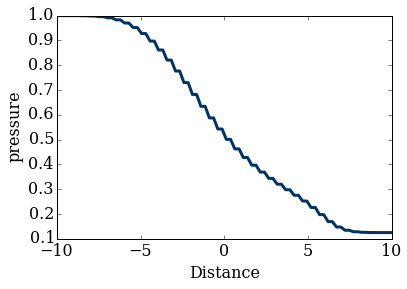

In [66]:
pyplot.plot(x, p, color='#003366', ls='-', lw=3)
pyplot.ylabel('pressure')
pyplot.xlabel('Distance')